# Fitting a gaussian curve with an MLP

In [3]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

from importlib import reload

import ap
import fa
import numpy as np
from train import *
from utils import *

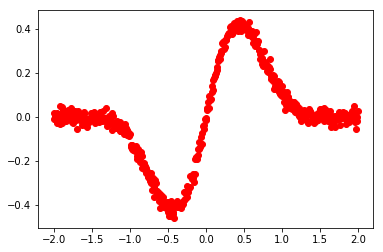

In [59]:
n = 500
x = np.linspace(-2, 2, n).reshape(-1, 1)
y = 0.8*np.exp(-((x*0.7)*2)**2) * np.sin(2*x) + 0.02 * np.random.randn(*x.shape)
plt.plot(x, y, 'ro');

### Train with and without feedback alignment layers

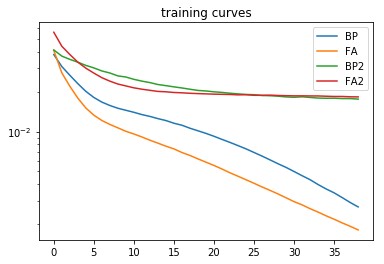

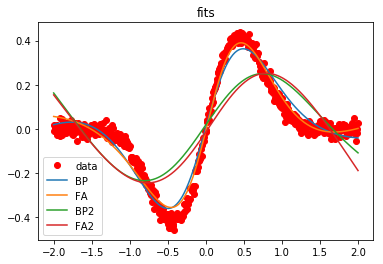

In [70]:
reload(ap)
reload(fa)

dataset = tensor_data(x, y)

seed = 100
h = 20
soap_lr = 1
soap_bias = 1e-3

train_args = {'data': dataset, 'epochs': 500, 'optimizer':'SGD', 'sample_every':100, 'lr':0.05}

net1 = nn.Sequential(fa.BPLinear(1, h), nn.Tanh(), fa.BPLinear(h, 1))
loss1 = train_net(net1, **train_args)['loss']

net2 = nn.Sequential(fa.BPLinear(1, h), nn.Tanh(), fa.FALinear(h, 1))
loss2 = train_net(net2, **train_args)['loss']

net3 = nn.Sequential(fa.BPLinear(1, h), ap.SOAP(soap_lr, soap_bias), nn.Tanh(), fa.BPLinear(h, 1))
loss3 = train_net(net3, updates=2, **train_args)['loss']

net4 = nn.Sequential(fa.BPLinear(1, h), ap.SOAP(soap_lr, soap_bias), nn.Tanh(), fa.FALinear(h, 1))
loss4 = train_net(net4, updates=2, **train_args)['loss']

# plot training curves
plt.figure(0)
plt.title("training curves")
plt.semilogy(loss1);
plt.semilogy(loss2);
plt.semilogy(loss3);
plt.semilogy(loss4);
plt.legend(['BP','FA', 'BP2', 'FA2']);

# plot solutions
plt.figure(1)
plt.title("fits")
net1.eval()
net2.eval()
net3.eval()
net4.eval()
y1 = fromT(net1(toT(x)))
y2 = fromT(net2(toT(x)))
y3 = fromT(net3(toT(x)))
y4 = fromT(net4(toT(x)))

plt.plot(x, y, 'ro');
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.legend(['data', 'BP', 'FA', 'BP2', 'FA2'])